# Linear Classification

In this lab you will implement parts of a linear classification model using the regularized empirical risk minimization principle. By completing this lab and analysing the code, you gain deeper understanding of these type of models, and of gradient descent.


## Problem Setting

The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images. Each of the patients is classified into two categories: normal (1) and abnormal (0). The training data contains 80 SPECT images from which 22 binary features have been extracted. The goal is to predict the label for an unseen test set of 187 tomography images.

In [4]:
import urllib.request
import pandas as pd
import numpy as np
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

testfile = urllib.request.URLopener()
testfile.retrieve("http://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.train", "SPECT.train")
testfile.retrieve("http://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.test", "SPECT.test")

df_train = pd.read_csv('SPECT.train', header=None)
df_test = pd.read_csv('SPECT.test', header=None)

train = df_train.values
test = df_test.values

y_train = train[:, 0]
X_train = train[:, 1:]
y_test = test[:, 0]
X_test = test[:, 1:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Exercise 1

Analyze the function learn_reg_ERM(X,y,lambda) which for a given $n\times m$ data matrix $\textbf{X}$ and binary class label $\textbf{y}$ learns and returns a linear model $\textbf{w}$.
The binary class label has to be transformed so that its range is $\left \{-1,1 \right \}$. 
The trade-off parameter between the empirical loss and the regularizer is given by $\lambda > 0$. 
To adapt the learning rate the Barzilai-Borwein method is used.

Try to understand each step of the learning algorithm and comment each line.


In [148]:
def learn_reg_ERM(X, y, lbda):
    max_iter = 1000  # hardcoded limit of iterations
    e = 0.001  # Acceptable error
    alpha = 1.  # Starting value for moving gradient

    w = np.random.randn(X.shape[1])  # Random feta vector
    for k in np.arange(max_iter):  # iterates before reaching hardcoded limit or reaching e
        h = np.dot(X, w)  # Dot product of point position and feta vector (result of liniar classification)
        l, lg = loss(h, y)  # calculation loss function from expected and real value
        r, rg = reg(w, lbda)  # calculation regulation term and its gradient
        g = np.dot(X.T, lg) + rg  # calculating total gradient
        if (k > 0):
            alpha = alpha * (np.dot(g_old.T, g_old)) / (np.dot((g_old - g).T, g_old))
            # simple onestep approximation
        w = w - alpha * g  # Calculation new feta vector
        if (np.linalg.norm(alpha * g) < e):  # breaking if reaching acceptable error
            break
        g_old = g  # Saving total gradient for next loop
        final_loss=np.mean(l)
    return w,final_loss

### Exercise 2

Fill in the code for the function loss(h,y) which computes the hinge loss and its gradient. 
This function takes a given vector $\textbf{y}$ with the true labels $\in \left \{-1,1\right \}$ and a vector $\textbf{h}$ with the function values of the linear model as inputs. The function returns a vector $\textbf{l}$ with the hinge loss $\max(0, 1 − y_{i} h_{i})$ and a vector $\textbf{g}$ with the gradients of the hinge loss w.r.t $\textbf{h}$. (Note: The partial derivative of the hinge loss with respect to $\textbf{h}$  is $g_{i} = −y $ if $l_{i} > 0$, else $g_{i} = 0$)

In [7]:
def loss(h, y):
    l = np.maximum(0, 1 - y * h)
    g = np.where(l > 0, -y, 0)
    return l, g

### Exercise 3

Fill in the code for the function reg(w,lambda) which computes the $\mathcal{L}_2$-regularizer and the gradient of the regularizer function at point $\textbf{w}$. 


$$r = \frac{\lambda}{2} \textbf{w}^{T}\textbf{w}$$

$$g = \lambda \textbf{w}$$

In [8]:
def reg(w, lbda):
    ##################
    #INSERT CODE HERE#
    ##################
    return (lbda / 2) * np.dot(w, w), lbda * w

### Exercise 4

Fill in the code for the function predict(w,x) which predicts the class label $y$ for a data point $\textbf{x}$ or a matrix $X$ of data points (row-wise) for a previously trained linear model $\textbf{w}$. If there is only a data point given, the function is supposed to return a scalar value. If a matrix is given a vector of predictions is supposed to be returned.

In [48]:
def predict(w, X):
    h = np.dot(X, w)

    preds = np.sign(h)

    if X.ndim == 1:
        return int(preds)
    else:
        return preds

### Exercise 5

#### 5.1 
Train a linear model on the training data and classify all 187 test instances afterwards using the function predict. 
Please note that the given class labels are in the range $\left \{0,1 \right \}$, however the learning algorithm expects a label in the range of $\left \{-1,1 \right \}$. Then, compute the accuracy of your trained linear model on both the training and the test data.

In [51]:
def accuracy(expected, real):
    assert expected.shape == real.shape
    return np.sum(expected == real) / expected.shape[0]

In [14]:
df_train = pd.read_csv('SPECT.train', header=None)
df_test = pd.read_csv('SPECT.test', header=None)

df_train = df_train.replace(0,-1)
df_test = df_test.replace(0,-1)

train = df_train.values
test = df_test.values

y_train = train[:, 0]
X_train = train[:, 1:]
y_test = test[:, 0]
X_test = test[:, 1:]

In [118]:
W,final_loss = learn_reg_ERM(X_train,y_train,3)
print(W)
print(predict(W,X_test))
print(accuracy(y_test,predict(W,X_test)))

loss: 2.917336199883414
loss: 128.1867204072083
loss: 24.378038074951466
loss: 51.8625
loss: 5.12549606898867
loss: 5.644723221240089
loss: 2.456463136724981
loss: 1.0404037789227658
loss: 2.9725709026774654
loss: 0.8249573403198515
loss: 0.5752453592111133
loss: 0.5351151196677238
loss: 0.5080552082611596
loss: 1.4740497640586079
loss: 0.47693012988997674
loss: 0.46128897627776927
loss: 0.4483331489827037
loss: 0.5592646298571267
loss: 0.43873765791446606
loss: 0.437040947670231
loss: 0.43681642767966905
loss: 0.43539929348055023
loss: 0.4371536901555745
loss: 0.43684378840247556
loss: 0.4382001074764033
loss: 0.4347767204939396
loss: 0.43447505065070563
loss: 0.4363200279639477
loss: 0.44920540769358547
loss: 0.45546682587293963
loss: 0.43810005703750815
loss: 0.43490804080025836
loss: 0.4347037255559171
loss: 0.4348747285901167
loss: 0.43439325013638486
loss: 0.4358321016218002
loss: 0.43462316364732567
loss: 0.43507731452892495
loss: 0.434248156495315
loss: 0.4341085514712734
loss:

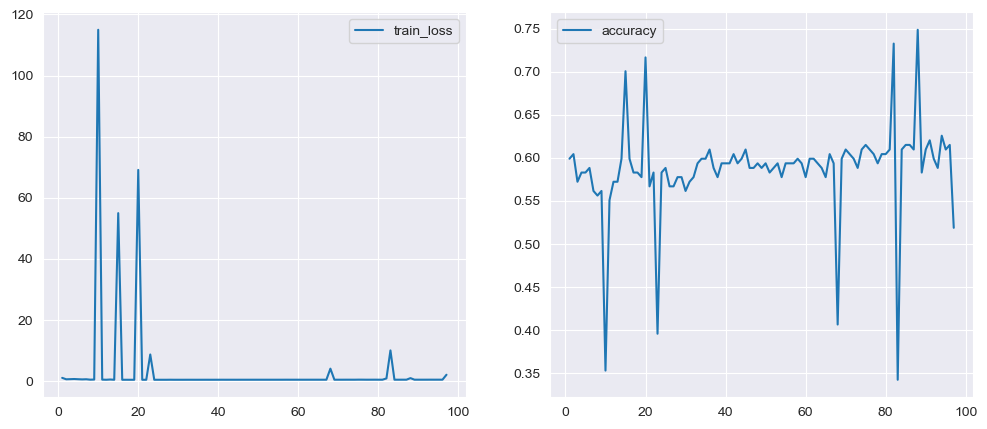

In [150]:
import matplotlib.pyplot as plt

Sample_size = 1

accuracy_data = []
training_loss_data = []
for i in range(3,100):
    lmbda = i/20

    temp_accuracy = []
    temp_loss = []
    for _ in range(Sample_size):
        W,final_loss = learn_reg_ERM(X_train,y_train,lmbda)
        temp_loss.append(final_loss)
        temp_accuracy.append(accuracy(y_test,predict(W,X_test)))

    training_loss_data.append(np.min(np.array(temp_loss)))
    accuracy_data.append(np.max(np.array(temp_accuracy)))


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(range(1, len(training_loss_data) + 1), training_loss_data, label="train_loss")
axs[1].plot(range(1, len(training_loss_data) + 1), accuracy_data, label="accuracy")
axs[0].legend()
axs[1].legend()
plt.show()

#### 5.2
Compare the accuracy of the linear model with the accuracy of a random forest and a decision tree on the training and test data set.

In [ ]:
##################
#INSERT CODE HERE#
##################

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_tree.fit(X_train, y_train)
print(clf_tree.score(X_test, y_test))

W,final_loss = learn_reg_ERM(X_train,y_train,3)
print(accuracy(y_test,predict(W,X_test)))

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.6149732620320856
0.5882352941176471
0.7754010695187166
